# First exercise: PCA

Data source: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29#

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
import pandas as pd
import seaborn as sns

In [2]:
# reading the data
data = pd.read_csv("data/Frogs_MFCCs.csv")
print("Original features of the dataset: \n", data.columns.values)
print("Original dimension of the dataset: \n", data.shape)

# keep features needed
data = data.drop(columns = ['Genus', 'Species', 'RecordID'])  # delete categorical features
family = data['Family'].values  # save label for later tasks
data = data.drop(columns = ['Family'])

# arrange features into a matrix
X = data.to_numpy(copy=True)
print("Dimension of the data matrix X: \n (N, D) = ", X.shape)

Original features of the dataset: 
 ['MFCCs_ 1' 'MFCCs_ 2' 'MFCCs_ 3' 'MFCCs_ 4' 'MFCCs_ 5' 'MFCCs_ 6'
 'MFCCs_ 7' 'MFCCs_ 8' 'MFCCs_ 9' 'MFCCs_10' 'MFCCs_11' 'MFCCs_12'
 'MFCCs_13' 'MFCCs_14' 'MFCCs_15' 'MFCCs_16' 'MFCCs_17' 'MFCCs_18'
 'MFCCs_19' 'MFCCs_20' 'MFCCs_21' 'MFCCs_22' 'Family' 'Genus' 'Species'
 'RecordID']
Original dimension of the dataset: 
 (7195, 26)
Dimension of the data matrix X: 
 (N, D) =  (7195, 22)


---

1. Preprocess the data by centering the variables and divide them by their standard deviation

In [3]:
def normalize(X):
    return np.divide((X - X.mean(axis=0)), X.std(axis=0))

In [4]:
X = normalize(X)

---

2. Compute PCA on these variables. Obtain and plot the eigenvalue spectrum (using log-scale for the y-axes)

In [5]:
def get_spectrum(X):
    # compute the covariance of the data 
    C = np.matmul(X.T, X)/(X.shape[0]) # D x D  
    # compute eigenvalues and eigenvectors of the covariance matrix
    evalues, evectors = np.linalg.eig(C)
    # arrange eigenvalues and eigenvectors following the decreasing order of the eigenvalues
    sorting_idx = np.argsort(-evalues)
    evalues = evalues[sorting_idx]
    evectors = evectors[:, sorting_idx]
    return evalues, evectors

def plot_log_spectrum(evalues):
    ticks = np.arange(1, len(evalues)+1)
    plt.figure(figsize=(16,9))
    plt.scatter(ticks, np.log(evalues), marker='o', color='orange')
    plt.xticks(ticks);
    plt.ylabel("Log-eigenvalues of the covariance matrix")
    plt.xlabel("Eigenvalue index")
    plt.show()

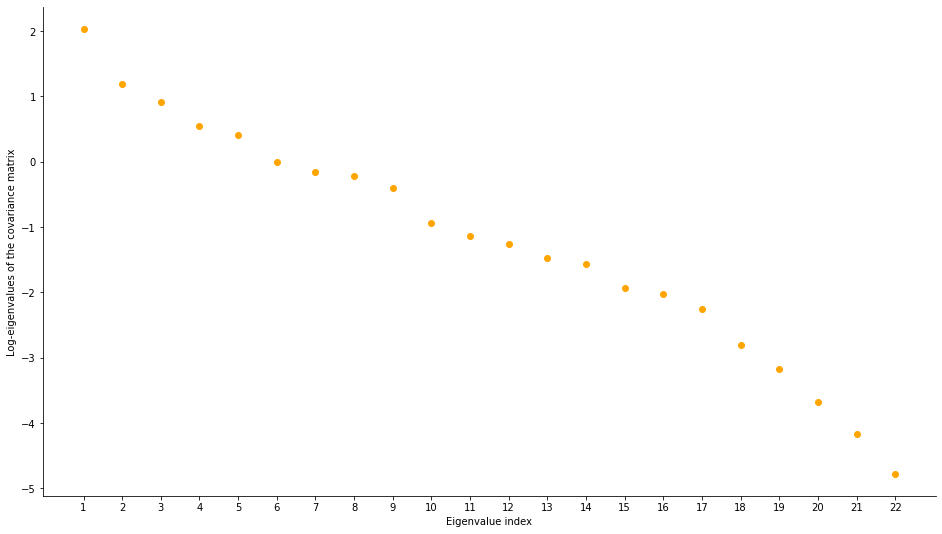

In [6]:
# get eigenvalues and eigenvectors of the covariance matrix of the data 
evalues, evectors = get_spectrum(X)
# plot eigenvalue spectrum (log-scale)
plot_log_spectrum(evalues)

In [7]:
# proportion of variance explained
exp_var = np.cumsum(evalues)/np.sum(evalues)
print(exp_var)

[0.34804736 0.49803043 0.61155666 0.69000442 0.75896376 0.80454415
 0.84320296 0.87989762 0.91047378 0.92836254 0.94302725 0.95590282
 0.96630686 0.97574844 0.98231206 0.98831815 0.99312273 0.99585925
 0.9977589  0.99891358 0.99961614 1.        ]


---

3. Project the data in the two first PCs and color it by the family column

In [8]:
def get_PC(X, num_components, plot=False):
    evalues, evectors = get_spectrum(X)
    if(plot):
        plot_log_spectrum(evalues)
    # projection matrix
    A = evectors[:, :num_components]  # D x d
    # compute principal components
    Y = np.matmul(X, A) # N x d
    return Y

def plot_PC(data, hue):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=hue);
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend(bbox_to_anchor=(1.05, 1));
    plt.show()

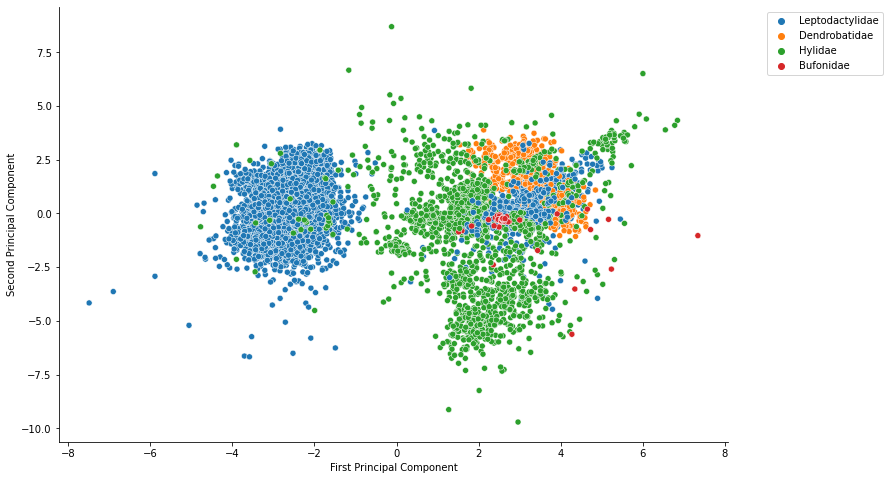

In [9]:
# compute first two principal components
Y  = get_PC(X, 2)
# plot coloring by the family column
plot_PC(Y, family)